In [1]:
import pyro

ModuleNotFoundError: No module named 'pyro'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyro.optim import Adam
from pyro.infer import SVI, Tracohe_ELBO
%matplotlib inline
np.random.seed(1234)

ModuleNotFoundError: No module named 'pyro'

## 2.1 Basics
### 2.1.1 Gamma distribution
For non-negative integers, $\Gamma(x)$ is defined as 
$$\Gamma(n)=(n-1)!$$
For positive real numbers, 
$$\Gamma(z)=\int_{0}^{\infty} x^{z-1} e^{-x} d x, \quad \Re(z)>0$$

from scipy.special import factorial, gamma
x_int = np.arange(1, 10)
x_real = np.linspace(1, 10)
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(x_int, factorial(x_int-1))
plt.subplot(1,2,2)
plt.plot(x_real, gamma(x_real))

1. With a shape parameter k and a scale parameter θ.
2. With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
3. With a shape parameter k and a mean parameter μ = kθ = α/β.

In [6]:
from scipy.stats import gamma

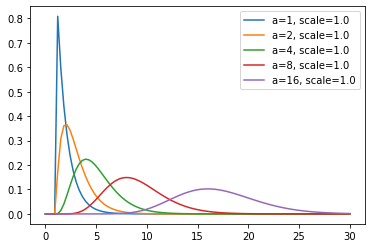

In [7]:
# a is the shape
x = np.linspace(0, 30, 100)
for a in [1, 2, 4, 8, 16]:
    scale = 1.
    y = gamma(a, scale).pdf(x)
    plt.plot(x, y, label=f"a={a}, scale={scale}")
plt.legend()

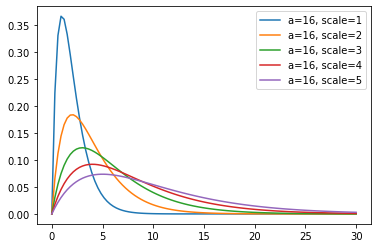

In [8]:
# a is the shape, fix a, shape won't change.
for scale in [1, 2, 3, 4, 5]:
    y = gamma(a=2, scale=scale).pdf(x)
    plt.plot(x, y, label=f"a={a}, scale={scale}")
plt.legend()

## 2.1 Binary Variables

### 2.1.1 The bernourlli distribution
The likelihood of the bernoulli varaibles is
$$p\left(x_{1}, \ldots, x_{n} | \theta\right)=\prod_{i=1}^{n} P\left(X=x_{i} | \theta\right)=\prod_{i=1}^{n} \theta^{x_{i}}(1-\theta)^{1-x_{i}}$$
Then maximize the log-likelihood
\begin{align*}
\log p\left(x_{1}, \ldots, x_{n} | \theta\right) &= \log\left(\prod_{i=1}^{n} P\left(X=x_{i} | \theta\right)\right)\\
                                                 &=\sum_{i=1}^{n} x_i \log \theta + (1-x_i)\log(1-\theta)\\
                                                 &=M_H\log\theta + (n-M_H)\log(1-\theta)
\end{align*}
The maxim value can be get when $\theta = \frac{M_H}{n}$.

In [9]:
from scipy.stats import bernoulli

p = 0.6
x = bernoulli(p).rvs(size=100)
# the maximum likelihood of bernoulli is the proportion of number of heads
print(x)
print(x.mean())

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
0.67


### 2.1.1 The beta distributions
$$\operatorname{Beta}(x|\alpha, \beta) =\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}=\frac{1}{\mathrm{B}(\alpha, \beta)} x^{\alpha-1}(1-x)^{\beta-1}$$
The mean and std are
\begin{align*}
\mu &=\frac{\alpha}{\alpha+\beta} \\
\sigma^{2} &=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
\end{align*}

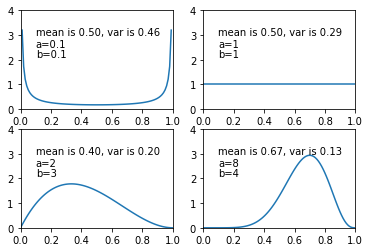

In [10]:
from scipy.stats import beta as Beta

x = np.linspace(0, 1, 100)
for i, (a, b) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    beta = Beta(a, b)
    plt.subplot(2, 2, i + 1)
    plt.xlim(0, 1)
    plt.ylim(0, 4)
    plt.plot(x,  beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
    plt.annotate(f"mean is {beta.mean():.2f}, var is {beta.std():.2f}", (0.1, 3))
plt.show()

### 2.1.1 The beta distributions as prior of bernoulli distribution

Suppose there are $k$ heads in the data, then the posterior distribution is 
\begin{align*}
p\left(\theta | x_{1}, \ldots, x_{n}\right)=\frac{1}{C} p\left(x_{1}, \ldots, x_{n} | \theta\right) p(\theta)=\frac{1}{C} \theta^{\alpha+k-1}(1-\theta)^{\beta+n-k-1} = \operatorname{Beta}(\alpha+k, \beta+n-k),
\end{align*}
This is called the **conjugate prior**, which means that the posterior as the same format as prior.

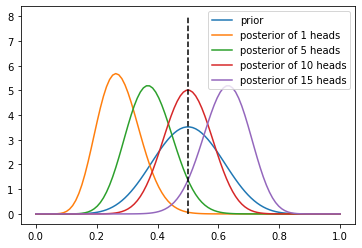

In [11]:
n = 20
a, b = 10, 10
prior_mean = a*1./(a+b)
x = np.linspace(0, 1, 100)
prior = Beta(a, a).pdf(x)
plt.plot(x, prior, label="prior")
# plt.annotate("prior", (0.1, 1.5))
n_heads = [1, 5, 10, 15]
for nh in n_heads:
    posterior = Beta(a+nh, b+n-nh).pdf(x)
    plt.plot(x, posterior, label=f"posterior of {nh} heads")
plt.plot([prior_mean, prior_mean], [0, 8], 'k--')
plt.legend()

The probability of next flip is head is 
$$p(H|x, \alpha, \beta)=\int_0^1 \theta \cdot  \operatorname{Beta}(\alpha+k, \beta+n-k) d\theta= \frac{\alpha + k}{\alpha + \beta + n}$$

In [12]:
import scipy.integrate as integrate
num_samples = 10000
x = np.linspace(0, 1, num_samples)
for nh in n_heads:
    posterior = Beta(a+nh, b+n-nh)
    res, error = integrate.quad(lambda a: a*posterior.pdf(a), 0, 1)
    print(f"{res:.3}, the ratio (nh+a)/(a+b+n) is {(nh+a)*1.0/(a+b+n)}")

# Test by sampling
for nh in n_heads:
    posterior = Beta(a+nh, b+n-nh)
    num_heads = 0
    for _ in range(num_samples):
        p = posterior.rvs()
        rnd = np.random.random_sample()
        if rnd < p: num_heads += 1
    print(num_heads*1./num_samples)

0.275, the ratio (nh+a)/(a+b+n) is 0.275
0.375, the ratio (nh+a)/(a+b+n) is 0.375
0.5, the ratio (nh+a)/(a+b+n) is 0.5
0.625, the ratio (nh+a)/(a+b+n) is 0.625
0.2802
0.3726
0.5043
0.6256
